In [129]:
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow import keras
import numpy
from tensorflow.keras import layers, models, regularizers, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


train_dir = "Split_Skin_Types/train"
validation_dir = "Split_Skin_Types/valid"
test_dir = "Split_Skin_Types/test"

dim = (224, 224)
channel = (3, )
input_shape = dim + channel
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory(validation_dir,
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=dim,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

num_class = testing_set.num_classes
        
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(lambda: generator,output_types=(tf.float32, tf.float32),output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class]))
    return tf_generator

train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)


base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False

#Adding custom layers

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation="relu")(x)
predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()
base_learning_rate = 0.001
model.compile(keras.optimizers.Adam(learning_rate=base_learning_rate),loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 50
from keras.callbacks import ReduceLROnPlateau
#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10,verbose=0,mode='auto', min_delta=0.0001,cooldown=0, min_lr=0)

history = model.fit(x=train_data,steps_per_epoch = len(train_generator),epochs=epochs,validation_data=val_generator,validation_steps=len(val_generator),verbose = 1, callbacks=[callback])

model.save('MobileNet_TransferLearning_Fruits360v48.h5')

Found 1163 images belonging to 4 classes.
Found 234 images belonging to 4 classes.
Found 225 images belonging to 4 classes.


Model: "functional_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_90 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_90[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,573,828 (13.63 MB)

 Trainable params: 1,315,844 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.4796 - loss: 1.4230 - val_accuracy: 0.6154 - val_loss: 0.9264
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 903ms/step - accuracy: 0.7234 - loss: 0.6912
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8046 - loss: 0.5571 - val_accuracy: 0.7479 - val_loss: 0.6050
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 827ms/step - accuracy: 0.7876 - loss: 0.5320
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8205 - loss: 0.4899 - val_accuracy: 0.7222 - val_loss: 0.6214
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 29s 798ms/step - accuracy: 0.8487 - loss: 0.4215
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8586 - loss: 0.3975 - val_accuracy: 0.7393 - val_loss: 0.6965
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 834ms/step - accuracy: 0.8254 - loss: 0.4430
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8597 - loss: 0.3519 - val_accuracy: 0.7778 - val_loss: 0.5734
Epoch 10/50
37/37 ━━━━

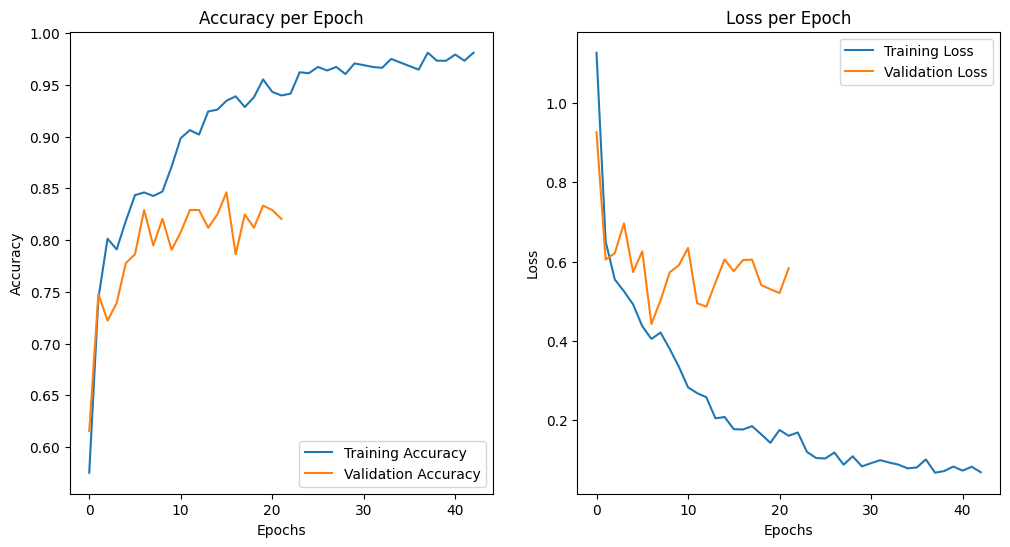

In [130]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [131]:
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

Accuracy on training data: 0.8267 
Loss on training data: 0.5729 

Accuracy on test data: 0.7778 
Loss on test data: 0.6794 

